# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></div><div class="lev2 toc-item"><a href="#Fill-gaps-in-time-feature" data-toc-modified-id="Fill-gaps-in-time-feature-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fill gaps in time feature</a></div><div class="lev2 toc-item"><a href="#Plotting-cases-time-distribution" data-toc-modified-id="Plotting-cases-time-distribution-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting cases time distribution</a></div><div class="lev2 toc-item"><a href="#Adding-other-case-features" data-toc-modified-id="Adding-other-case-features-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Adding other case features</a></div><div class="lev1 toc-item"><a href="#Cluster-data" data-toc-modified-id="Cluster-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cluster data</a></div><div class="lev2 toc-item"><a href="#Metric" data-toc-modified-id="Metric-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Metric</a></div><div class="lev2 toc-item"><a href="#With-one-hot-encoding" data-toc-modified-id="With-one-hot-encoding-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>With one hot encoding</a></div><div class="lev3 toc-item"><a href="#Kmeans" data-toc-modified-id="Kmeans-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Kmeans</a></div><div class="lev1 toc-item"><a href="#Catigorical-vectorization-with-probabilities" data-toc-modified-id="Catigorical-vectorization-with-probabilities-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Catigorical vectorization with probabilities</a></div><div class="lev1 toc-item"><a href="#K-prototypes" data-toc-modified-id="K-prototypes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-prototypes</a></div><div class="lev1 toc-item"><a href="#Adding-more-real-features" data-toc-modified-id="Adding-more-real-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Adding more real features</a></div><div class="lev2 toc-item"><a href="#Kmeans" data-toc-modified-id="Kmeans-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Kmeans</a></div><div class="lev2 toc-item"><a href="#Real-features-plus-vendor-and-materials" data-toc-modified-id="Real-features-plus-vendor-and-materials-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Real features plus vendor and materials</a></div><div class="lev2 toc-item"><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Decision Tree</a></div><div class="lev3 toc-item"><a href="#4-clusters" data-toc-modified-id="4-clusters-531"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>4 clusters</a></div><div class="lev3 toc-item"><a href="#7-clusters" data-toc-modified-id="7-clusters-532"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>7 clusters</a></div><div class="lev1 toc-item"><a href="#ToDo" data-toc-modified-id="ToDo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ToDo</a></div><div class="lev1 toc-item"><a href="#New-features" data-toc-modified-id="New-features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>New features</a></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib as im
%matplotlib inline

In [2]:
data = pd.read_csv("data/train_test/train(in scope).csv")

In [3]:
pd.set_option('display.max_columns', None);

In [4]:
data.head()

,Unnamed: 0,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,Document Type,Document Type Description,Document Category,Document Category Description,User ID,User Name,User Type,Vendor,Vendor Name,Material,Material Text,Material Description,Purchase Organisation,Purchase Organisation Description,Purchase Group,Quantity,Amount in Reporting Currency,Purchase Document,Purchase Document Line Item,Reference Document,Reference Document Line Item,Context,SELECT,START DATE,END DATE,CASE_EVENTATT,User Group,User Country,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000.0,Unknown,ZNB,NaN,F,Purchase order,HIMPEHEN,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,-6280.0,-393.32,2000475085,10.0,2.000475e+09,10.0,Material type: Waste Materials; Material type:...,2 - Purchase Order; 2 - Purchase Order,2014/10/01 01:17:29,2014/10/01 01:17:29,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
1,1,2000475085-10,Purchase order item updated,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,Unknown,ZNB,NaN,Not set,Purchase order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,NaN,NaN,2000475085,10.0,2.000475e+09,10.0,ME22N:EKPO - BPUMZ; 9380 -> 1; ME22N:EKPO - BR...,12 - PO changes; 12 - PO changes; 12 - PO chan...,2014/10/10 03:02:09,2014/10/10 03:02:09,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000475085-10,Purchase order item updated - amount,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,Unknown,ZNB,NaN,Not set,Purchase order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,NaN,NaN,2000475085,10.0,2.000475e+09,10.0,ME22N:EKPO - NETWR; 587.47 -> 196.66,12 - PO changes,2014/10/10 03:02:09,2014/10/10 03:02:09,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000475085-10,Purchase order item updated - quantity,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,Unknown,ZNB,NaN,Not set,Purchase order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,NaN,NaN,2000475085,10.0,2.000475e+09,10.0,ME22N:EKPO - MENGE; 1.000 -> 3140.000,12 - PO changes,2014/10/10 03:02:09,2014/10/10 03:02:09,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000475085-10,Goods Return (Goods Receipt for Purchase Order),Goods Return,Delivery (in scope),2014-10-10 03:15:16,2014-10-10 03:15:16,2014-10-10 00:00:00,NaN,3000.0,Unknown,WE,Goods receipt,WE,Goods Receipt for Purchase Order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,Purchase organisation from 3000,Purchase organisation from 3000,Purchase group from 3000,-3140.0,-196.66,2000475085,10.0,5.011839e+09,1.0,NaN,3a - Delivery (in scope),2014/10/10 03:15:16,2014/10/10 03:15:16,2000475085-10,NaN,NaN,NaN,NaN,NaN,Goods Return (Goods Receipt for Purchase Order...,NaN,NaN,NaN,NaN,NaN,NaN


# Data preparation

## Fill gaps in time feature

DATE -> SYS DATE -> CREATION DATE -> DOCUMENT DATE

In [27]:
pd.isnull(data["SYS DATE"]).any()

False

In [31]:
# length of date format
len(data["SYS DATE"][0])

19

In [28]:
for i, date in enumerate(data["SYS DATE"]):
    if len(date) != 19:
        print(date, i)
        print(data["CREATION DATE"][i])
        print(data["DOCUMENT DATE"][i])

In [24]:
data["SYS DATE"][5184] = data["CREATION DATE"][5184]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
data["SYS DATE"][5184]

'2014-11-28 10:43:15'

In [ ]:
# date preprocessing v0
for i in range(data.shape[0]):
    event = data.loc[i]
    creation_date = event["CREATION DATE"]
    document_date = event["DOCUMENT DATE"]
    sys_date = event["SYS DATE"]
    if pd.isnull(creation_date):
        if not pd.isnull(sys_date):
            data.at[i, "CREATION DATE"] = sys_date
        else:
            data.at[i, "CREATION DATE"] = document_date

In [33]:
# date preprocessing v1
data["DATE"] = pd.to_datetime(data["SYS DATE"], )

In [34]:
data.head()

,Unnamed: 0,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,Document Type,Document Type Description,Document Category,Document Category Description,User ID,User Name,User Type,Vendor,Vendor Name,Material,Material Text,Material Description,Purchase Organisation,Purchase Organisation Description,Purchase Group,Quantity,Amount in Reporting Currency,Purchase Document,Purchase Document Line Item,Reference Document,Reference Document Line Item,Context,SELECT,START DATE,END DATE,CASE_EVENTATT,User Group,User Country,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A,DATE
0,0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000.0,Unknown,ZNB,NaN,F,Purchase order,HIMPEHEN,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,-6280.0,-393.32,2000475085,10.0,2.000475e+09,10.0,Material type: Waste Materials; Material type:...,2 - Purchase Order; 2 - Purchase Order,2014/10/01 01:17:29,2014/10/01 01:17:29,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32,2014-10-01 01:17:29
1,1,2000475085-10,Purchase order item updated,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,2014-10-10 03:02:09,NaN,NaN,3000.0,Unknown,ZNB,NaN,Not set,Purchase order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,NaN,NaN,2000475085,10.0,2.000475e+09,10.0,ME22N:EKPO - BPUMZ; 9380 -> 1; ME22N:EKPO - BR...,12 - PO changes; 12 - PO changes; 12 - PO chan...,2014/10/10 03:02:09,2014/10/10 03:02:09,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-10 03:02:09
2,2,2000475085-10,Purchase order item updated - amount,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,2014-10-10 03:02:09,NaN,NaN,3000.0,Unknown,ZNB,NaN,Not set,Purchase order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,NaN,NaN,2000475085,10.0,2.000475e+09,10.0,ME22N:EKPO - NETWR; 587.47 -> 196.66,12 - PO changes,2014/10/10 03:02:09,2014/10/10 03:02:09,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-10 03:02:09
3,3,2000475085-10,Purchase order item updated - quantity,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,2014-10-10 03:02:09,NaN,NaN,3000.0,Unknown,ZNB,NaN,Not set,Purchase order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,3000,Unknown,WAI,NaN,NaN,2000475085,10.0,2.000475e+09,10.0,ME22N:EKPO - MENGE; 1.000 -> 3140.000,12 - PO changes,2014/10/10 03:02:09,2014/10/10 03:02:09,2000475085-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-10 03:02:09
4,4,2000475085-10,Goods Return (Goods Receipt for Purchase Order),Goods Return,Delivery (in scope),2014-10-10 03:15:16,2014-10-10 03:15:16,2014-10-10 00:00:00,NaN,3000.0,Unknown,WE,Goods receipt,WE,Goods Receipt for Purchase Order,VLIEBEDI,NaN,NaN,33756,Unknown,100011201,Papier en karton,Papier en karton,Purchase organisation from 3000,Purchase organisation from 3000,Purchase group from 3000,-3140.0,-196.66,2000475085,10.0,5.011839e+09,1.0,NaN,3a - Delivery (in scope),2014/10/10 03:15:16,2014/10/10 03:15:16,2000475085-10,NaN,NaN,NaN,NaN,NaN,Goods Return (Goods Receipt for Purchase Order...,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-10 03:15:16


## Plotting cases time distribution

In [35]:
case_ids = np.unique(data["CASE"])
deltas = []
for case_id in case_ids:
    case = data[data["CASE"] == case_id]
    delta = case.iloc[-1]["DATE"] - case.iloc[0]["DATE"]
    deltas.append(delta)

In [36]:
cases_timedeltas = pd.Series(deltas, index=case_ids)

In [37]:
# Timedelta.value stores delta value in second multilied by 10e8
deltas_in_seconds = cases_timedeltas.apply(lambda x: int(x.value / 10e8)).values

In [38]:
import seaborn as sns

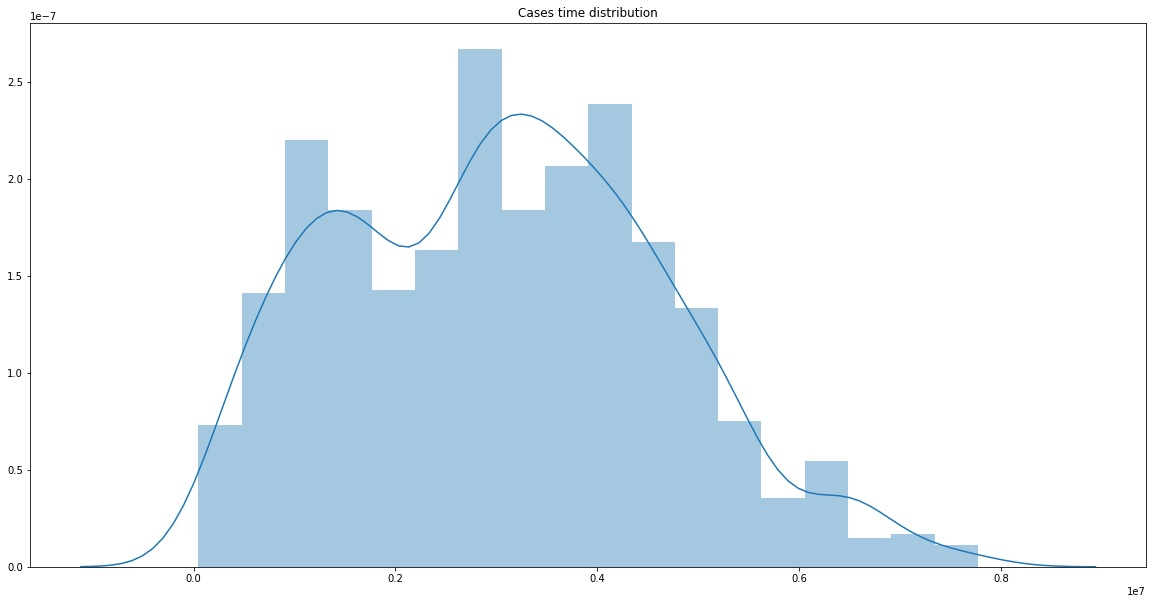

In [39]:
plt.figure(figsize=(20,10))
sns.distplot(deltas_in_seconds)
plt.title("Cases time distribution");

## Adding other case features

Lets add vendor, material to case encoding, but before we check that every case got no more than one vendor and material

In [40]:
case_ids = np.unique(data["CASE"])
bad_cases = []
for case_id in case_ids:
    case_vendors = set(data[data["CASE"] == case_id]["Vendor"])
    if len(case_vendors) > 1:
        bad_cases.append((case_id, len(case_vendors)))

In [41]:
len(bad_cases)

121

In [42]:
np.unique(np.array(bad_cases)[:, 1])

array(['2', '3'], dtype='<U14')

Now we know that there is no more than 3 vendors for a case. Lets choose the vender that has the biggest number of events in case

In [43]:
from collections import Counter

In [44]:
case_ids = np.unique(data["CASE"])
vendors = []
for case_id in case_ids:
    case_vendors = data[data["CASE"] == case_id]["Vendor"]
    unique_case_vendors = set(case_vendors)
    if len(unique_case_vendors) > 1:
        counts = Counter(case_vendors)
        vendor = counts.most_common(1)[0][0]
    else:
        vendor = list(unique_case_vendors)[0]
    vendors.append(vendor)
    

In [45]:
cases_vendors = pd.Series(vendors, index=case_ids)

The same for material

In [46]:
case_ids = np.unique(data["CASE"])
bad_cases = []
for case_id in case_ids:
    case_materials = set(data[data["CASE"] == case_id]["Material"])
    if len(case_materials) > 1:
        bad_cases.append((case_id, len(case_materials)))

In [47]:
len(bad_cases)

0

In [48]:
case_ids = np.unique(data["CASE"])
materials = []
for case_id in case_ids:
    case_material = list(data[data["CASE"] == case_id]["Material"])[0]
    materials.append(case_material)

In [49]:
np.sum(np.array(materials) == 'Not set')

402

402 gaps is not good but we gto nothing to do with that

In [510]:
cases_materials = pd.Series(materials, index=case_ids)

In [473]:
cases = pd.DataFrame({
    "timedelta" : cases_timedeltas,
    "vendor": cases_vendors,
    "material": cases_materials
}, index=case_ids)

In [474]:
cases["timedelta"] = cases["timedelta"].apply(lambda x: int(x.value / 10e8))

# Cluster data

## Metric

In [73]:
from scipy.spatial.distance import cdist

In [74]:
def in_cluster_distance(X, clusters):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        centroid = np.mean(cluster, axis=0)
        distances.append(np.mean(cdist([centroid], cluster)))
    return distances

def between_cluster_distance(X, clusters):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        other_clusters = X[clusters != cluster_name]
        
        distances.append(np.mean(cdist(cluster, other_clusters, )))
    return distances

def cluster_sizes(X, clusters):
    sizes = []
    for cluster in np.unique(clusters):
        sizes.append(np.sum(clusters == cluster))
    return sizes
    

## With one hot encoding

In [477]:
cases.head()

,material,timedelta,vendor
2000475085-10,100011201,789316,33756
2000475591-10,11369,6751235,24397
2000475831-10,4275,7785843,38049
2000475925-10,100011798,4847807,11236
2000475925-30,100011798,4847807,11236


In [66]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [479]:
one_hot_cases = pd.get_dummies(cases, columns=["material", "vendor"], drop_first=True)

In [480]:
X = one_hot_cases.as_matrix()

In [481]:
ss = StandardScaler()
X = ss.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Kmeans

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [483]:
from sklearn.manifold import TSNE
X_plot = TSNE(n_components=2).fit_transform(X)

In [484]:
metrics = [silhouette_score, in_cluster_distance, between_cluster_distance]
names = ["Silhouette score", "In cluster distances", "Between cluster distances"]

n_clusters = 500
km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10, init="random")
clusters = km.fit_predict(X)

for name, metric in zip(names[:1], metrics[:1]):
    print(name, metric(X, clusters))

Silhouette score 0.548198057408599


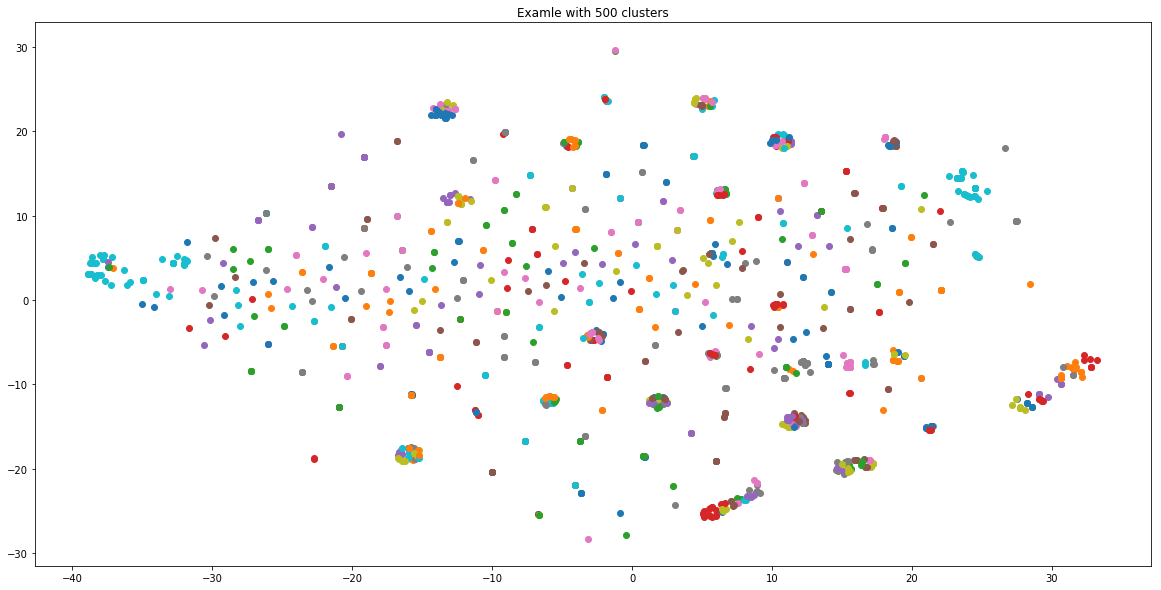

In [485]:
plt.figure(figsize=(20,10))
for i in np.unique(clusters):
    points = X_plot[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Examle with 500 clusters")
# plt.legend()
plt.show()

Silhouette score 0.42867882651648886


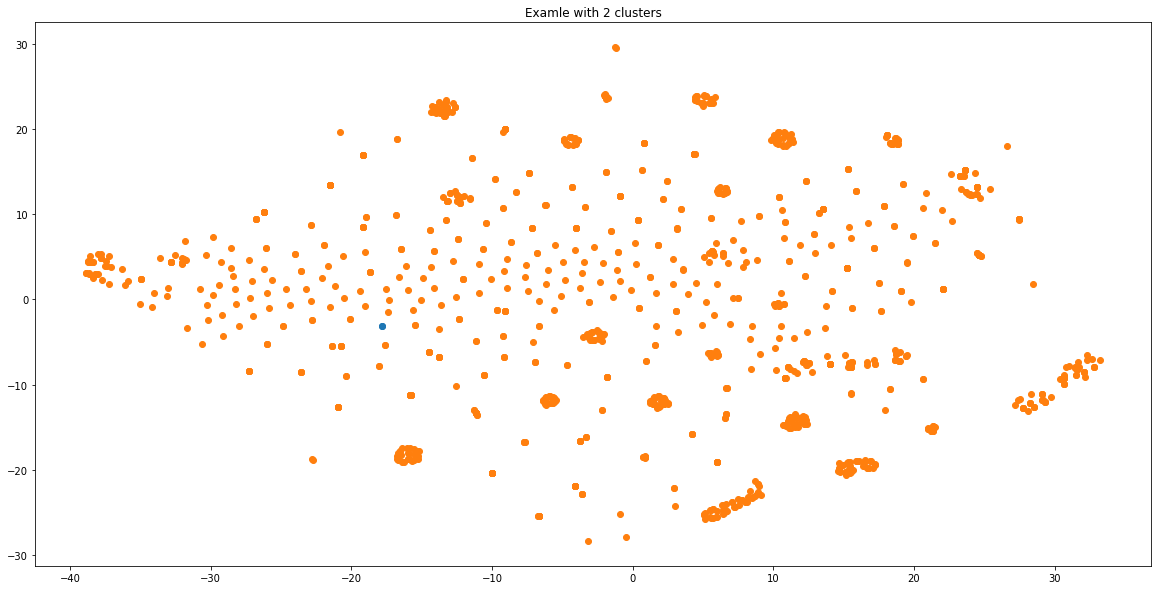

In [486]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10, init="random")
clusters = km.fit_predict(X)

for name, metric in zip(names[:1], metrics[:1]):
    print(name, metric(X, clusters))
    
plt.figure(figsize=(20,10))
for i in np.unique(clusters):
    points = X_plot[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Examle with 2 clusters")
# plt.legend()
plt.show()

In [487]:
cases[clusters == 0]

,material,timedelta,vendor
2000476581-10,9430,3572366,37536
2000488399-10,9430,3465227,37536


В данном случае Kmeans плохо кластеризует на маленькое количетсво кластеров, потому что из-за большой размерности признак timedelta очень слабо влияет на функцию расстояния, а остальные два признака очень сильно дробят выборку из-за большого количества возможных значений этих признаков и маленького размера выборки. По этой же причине кластеризация получается очень нестабльной: в зависимости он начального центройда в один кластер попадает одна маленькая группа похожих между собой объектов, а в другой все остальные маленьке группы. Хорошая кластеризация получается при большом количестве кластеров (300-500). При маленьком количетсве кластеров метрика может тоже показывать хорошее значение, но при этом размеры кластеров получаюся несоотносимыми друг с другом (в первом кластере один объект, во втором остыльные).

# Catigorical vectorization with probabilities

In [50]:
case_ids = np.unique(data["CASE"])
vendors = []
for case_id in case_ids:
    case_vendors = data[data["CASE"] == case_id]["Vendor"]
    unique_case_vendors = set(case_vendors)
    if len(unique_case_vendors) > 1:
        counts = Counter(case_vendors)
        vendor = counts.most_common(1)[0][0]
    else:
        vendor = list(unique_case_vendors)[0]
    count = len(data[data["Vendor"] == vendor])
    vendors.append(count / data.shape[0])
    

In [51]:
cases_vendors = pd.Series(vendors, index=case_ids)

In [52]:
case_ids = np.unique(data["CASE"])
materials = []
for case_id in case_ids:
    case_material = list(data[data["CASE"] == case_id]["Material"])[0]
    count = len(data[data["Material"] == case_material])
    materials.append(count / data.shape[0])

In [53]:
cases_materials = pd.Series(materials, index=case_ids)

In [54]:
cases = pd.DataFrame({
    "timedelta" : cases_timedeltas,
    "vendor": cases_vendors,
    "material": cases_materials
}, index=case_ids)

In [55]:
cases["timedelta"] = cases["timedelta"].apply(lambda x: int(x.value / 10e8))

In [494]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [495]:
X_plot = TSNE(n_components=2).fit_transform(X)

In [496]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10, init="random")
clusters = km.fit_predict(X)

for name, metric in zip(names, metrics):
    print(name, metric(X, clusters))

Silhouette score -0.043893827979365516
In cluster distances [8.51385413788252, 18.126464188794124]
Between cluster distances [21.288802554119176, 21.288802554119176]


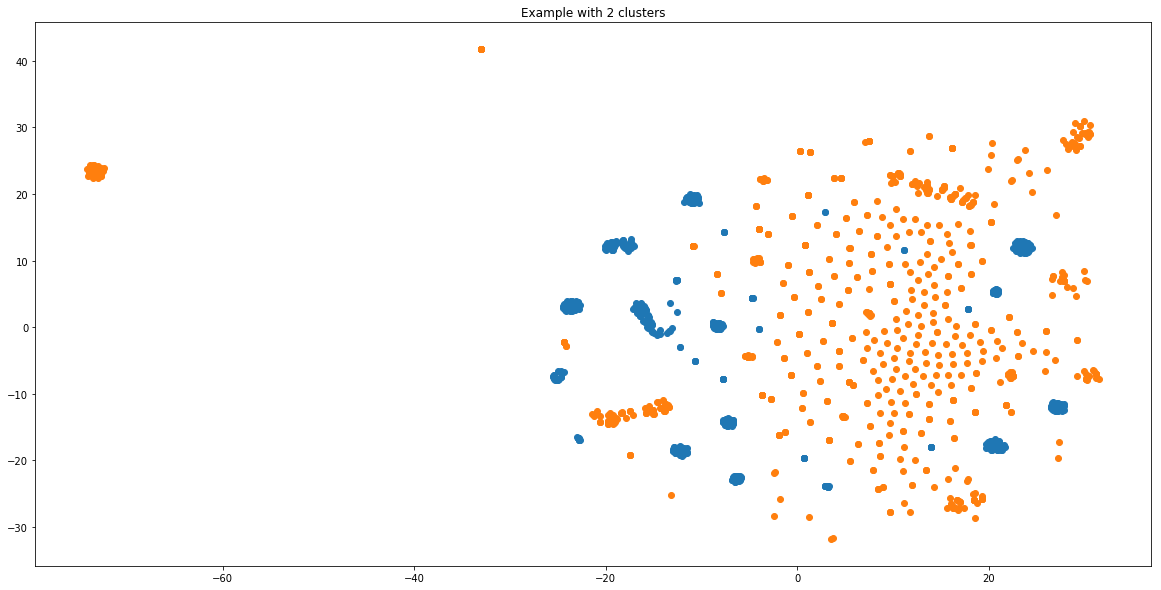

In [497]:
plt.figure(figsize=(20,10))
for i in np.unique(clusters):
    points = X_plot[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Example with 2 clusters")
# plt.legend()
plt.show()

Silhouette score 0.4517125657519832


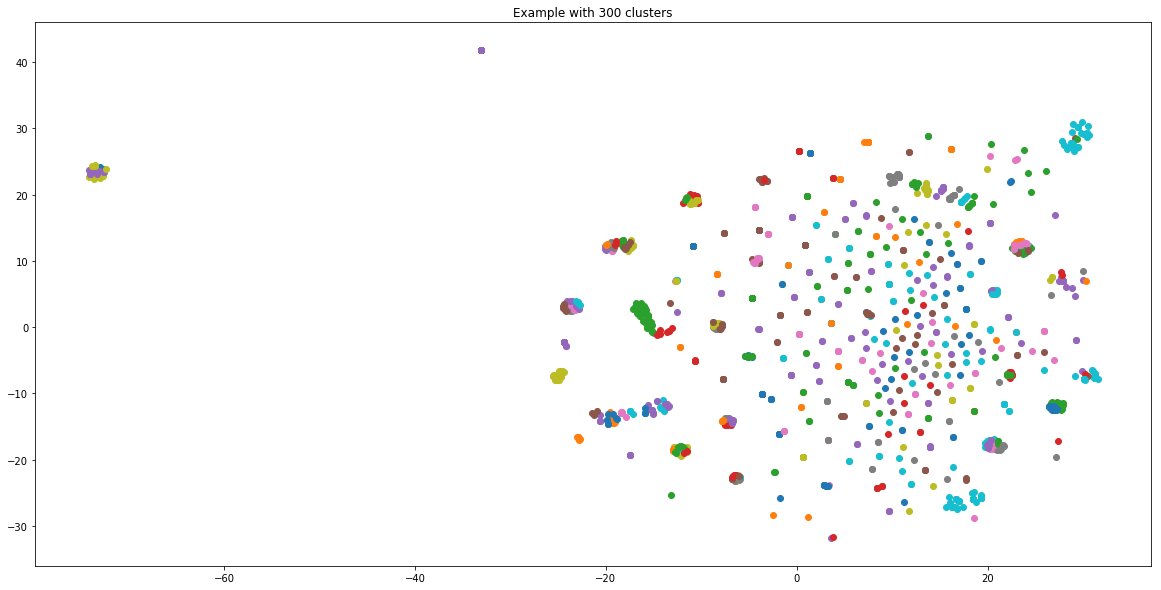

In [499]:
n_clusters = 300
km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10, init="random")
clusters = km.fit_predict(X)

for name, metric in zip(names[:1], metrics[:1]):
    print(name, metric(X, clusters))

plt.figure(figsize=(20,10))
for i in np.unique(clusters):
    points = X_plot[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Example with 300 clusters")
# plt.legend()
plt.show()

# K-prototypes

k-prototypes это комбинация двух алгоритмов kmeans и kmodes. Второй используется для кластеразиции категориальных данных. Таким образом такой алгоритм должен показывать лучший результат на данных с категориальными и вещесьвенными признаками

In [500]:
from kmodes.kprototypes import KPrototypes

In [511]:
X = pd.DataFrame({
    "timedelta" : cases_timedeltas,
    "vendor": cases_vendors,
    "material": cases_materials
}, index=case_ids)

In [513]:
X[X["material"] == 'Not set'] = '0'
X[X["vendor"] == 'Not set'] = '0'

In [514]:
X["timedelta"] = ss.fit_transform(X["timedelta"])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype timedelta64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains 

In [515]:
X = X.as_matrix()

In [516]:
n_clusters = 2
kp = KPrototypes(n_clusters=n_clusters)
clusters = kp.fit_predict(X, categorical=[0, 2])
for name, metric in zip(names[:1], metrics[:1]):
    print(name, metric(X, clusters))

Silhouette score 0.2513009661948351


Result is not good but stable

# Adding more real features

Добавим в качестве вещественных признаков суммарное количество и суммарную цену

In [56]:
data["Quantity"].fillna(0, inplace=True)
data["Amount in Reporting Currency"].fillna(0, inplace=True)

In [58]:
case_ids = np.unique(data["CASE"])
quantites = []
amounts = []
for case_id in case_ids:
    case = data[data["CASE"] == case_id]
    invoieces = case[case["SIMPLIFIED EVENT"] == 'Invoice Reciept']
    quantity = 0
    amount = 0
    if invoieces.shape[0] != 0:
        quantity = np.sum(invoieces["Quantity"])
        amount = np.sum(invoieces["Amount in Reporting Currency"])
    quantites.append(quantity)
    amounts.append(amount)

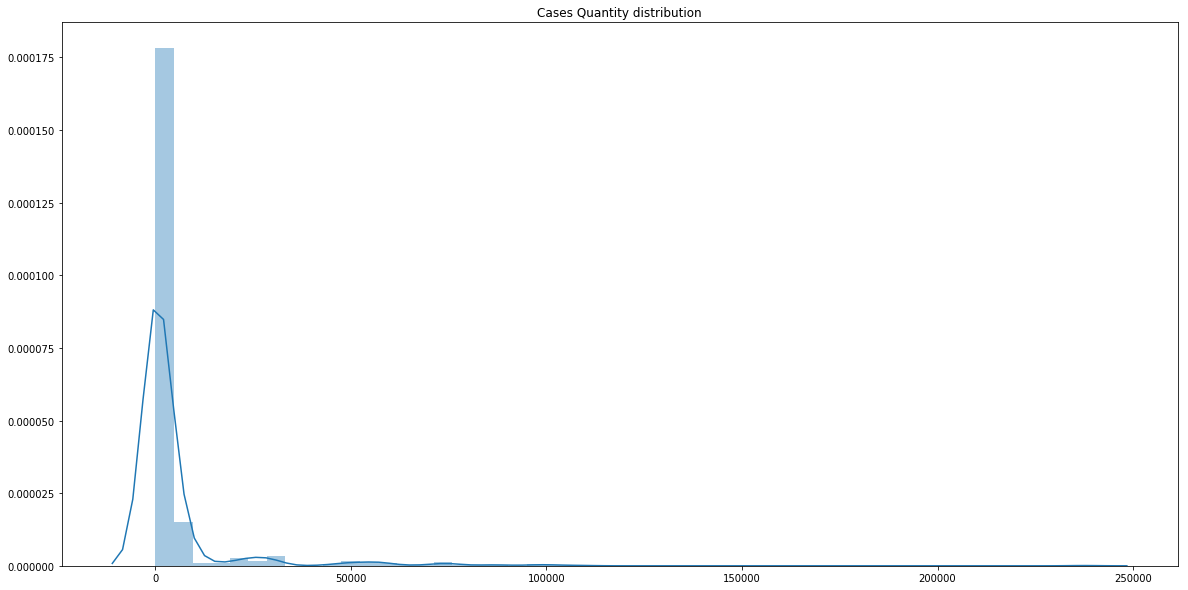

In [59]:
plt.figure(figsize=(20,10))
sns.distplot(quantites)
plt.title("Cases Quantity distribution");

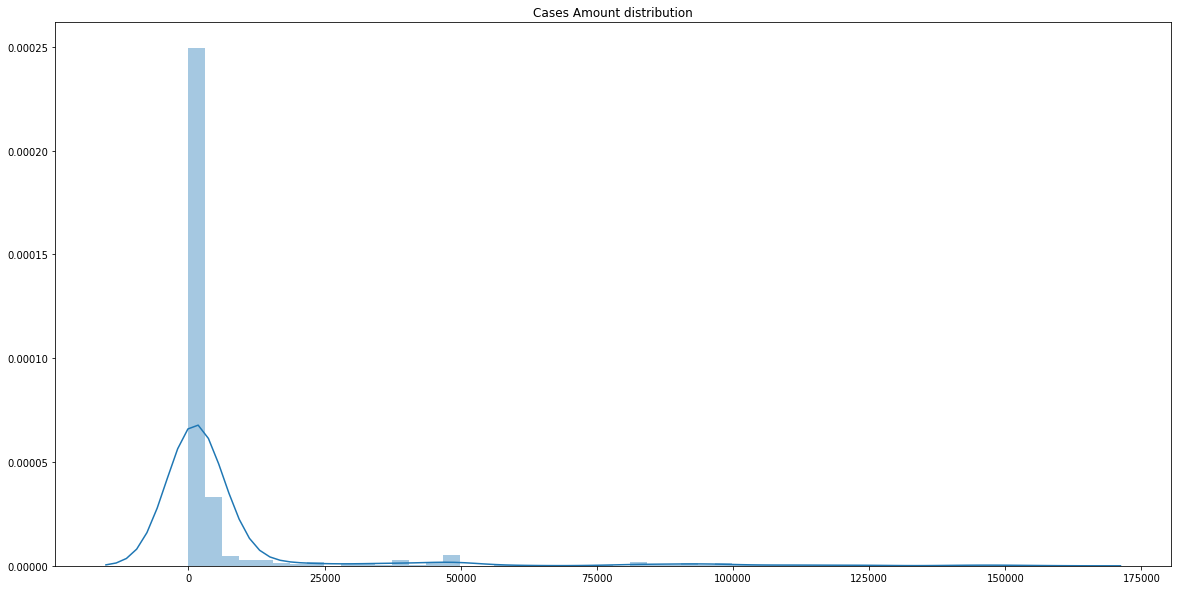

In [60]:
plt.figure(figsize=(20,10))
sns.distplot(amounts)
plt.title("Cases Amount distribution");

In [61]:
cases_quantities = pd.Series(quantites, index=case_ids)
cases_amount = pd.Series(amounts,index=case_ids)

In [109]:
cases = pd.DataFrame({
    "timedelta" : cases_timedeltas,
    "quantity": cases_quantities,
    "amount": cases_amount
}, index=case_ids)

In [110]:
cases["timedelta"] = cases["timedelta"].apply(lambda x: int(x.value / 10e8))

## Kmeans

In [67]:
ss = StandardScaler()

In [68]:
X = ss.fit_transform(cases)

In [69]:
X_plot = TSNE(n_components=2).fit_transform(X)

NameError: name 'TSNE' is not defined

In [528]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10)
clusters = km.fit_predict(X)

for name, metric in zip(names, metrics):
    print(name, metric(X, clusters))

Silhouette score 0.7893501312005216
In cluster distances [0.9436748500014529, 2.0272439879703508]
Between cluster distances [6.750955158294198, 6.7509551582941985]


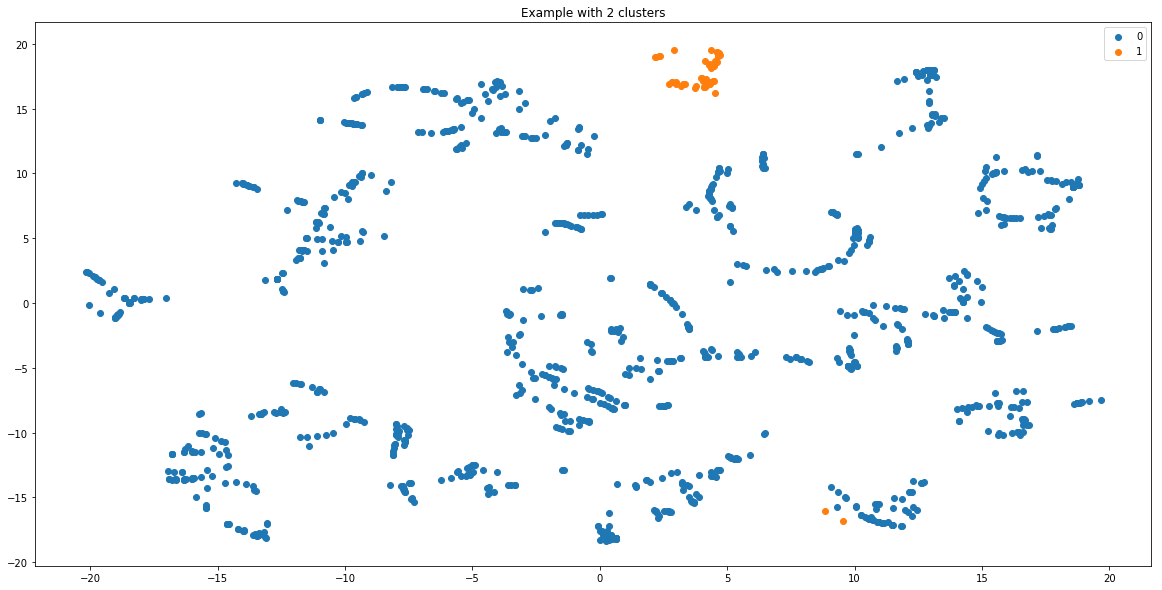

In [529]:
plt.figure(figsize=(20,10))
for i in np.unique(clusters):
    points = X_plot[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Example with 2 clusters")
plt.legend()
plt.show()

In [530]:
str_clusters = ["c" + str(c) for c in clusters]
cases_for_plot = cases.copy()
cases_for_plot["Clusters"] = np.array(str_clusters)

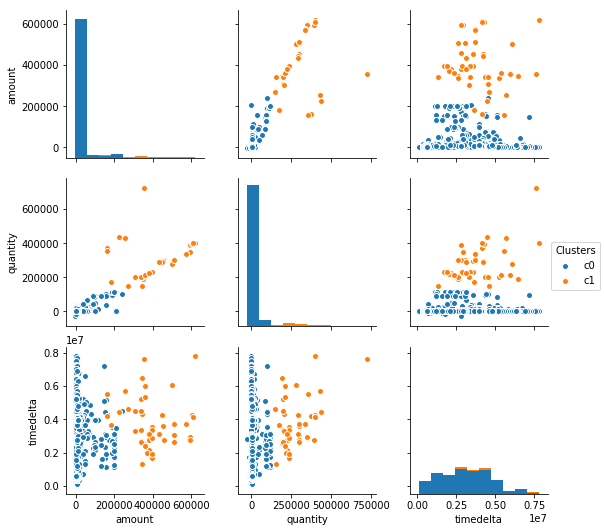

In [542]:
sns.pairplot(cases_for_plot, hue="Clusters");

## Real features plus vendor and materials

In [111]:
cases["vendor"] = cases_vendors
cases["material"] = cases_materials

In [71]:
from sklearn.manifold import TSNE
X = ss.fit_transform(cases)
X_plot = TSNE(n_components=2).fit_transform(X)

Silhouette score 0.5844063141233083
In cluster distances [2.2756140980016246, 1.7334503441691742]
Between cluster distances [5.782863540466003, 5.7828635404660025]
Cluster sizes [72, 1168]


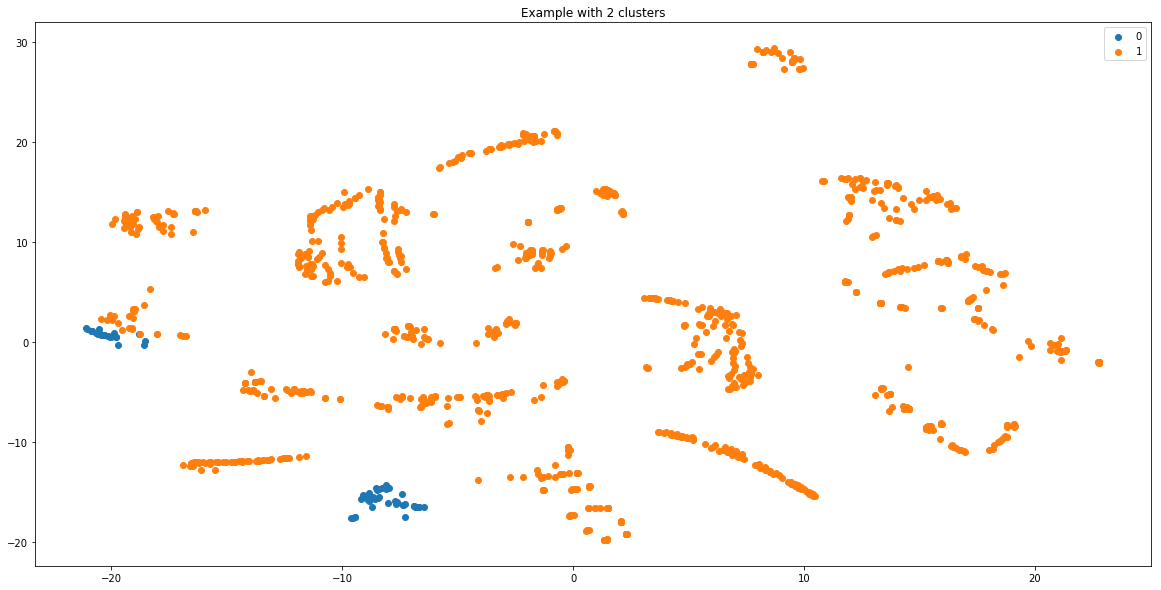

Silhouette score 0.3968062475558541
In cluster distances [0.8376312509019518, 1.5735102968709545, 2.043693329155559]
Between cluster distances [3.1670317995944846, 3.335139953331591, 6.875755201204505]
Cluster sizes [402, 790, 48]


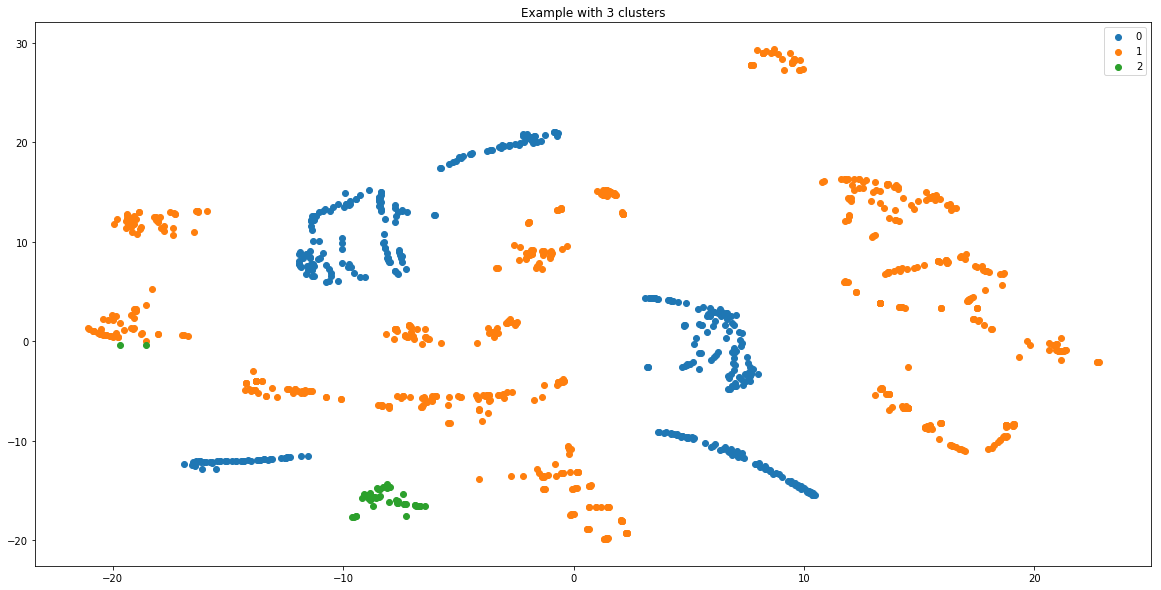

Silhouette score 0.520207230041805
In cluster distances [0.8629801282407756, 1.109883089787402, 0.8376312509019518, 2.043693329155559]
Between cluster distances [3.2330903194424625, 3.0732771482434202, 3.1670317995944846, 6.875755201204505]
Cluster sizes [270, 520, 402, 48]


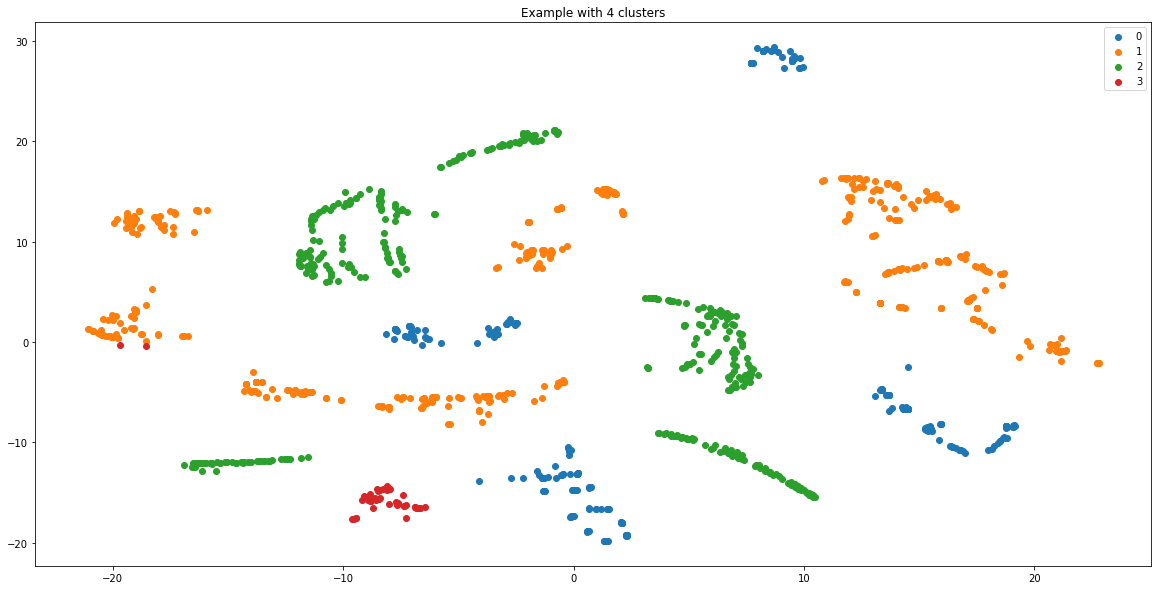

Silhouette score 0.5052816644178961
In cluster distances [1.1377355477792528, 0.8376312509019518, 1.991716236071462, 0.8629801282407756, 0.5392295311532337]
Between cluster distances [2.784310384511535, 3.1670317995944846, 6.9696827185878085, 3.2330903194424625, 2.83092873833482]
Cluster sizes [234, 402, 46, 270, 288]


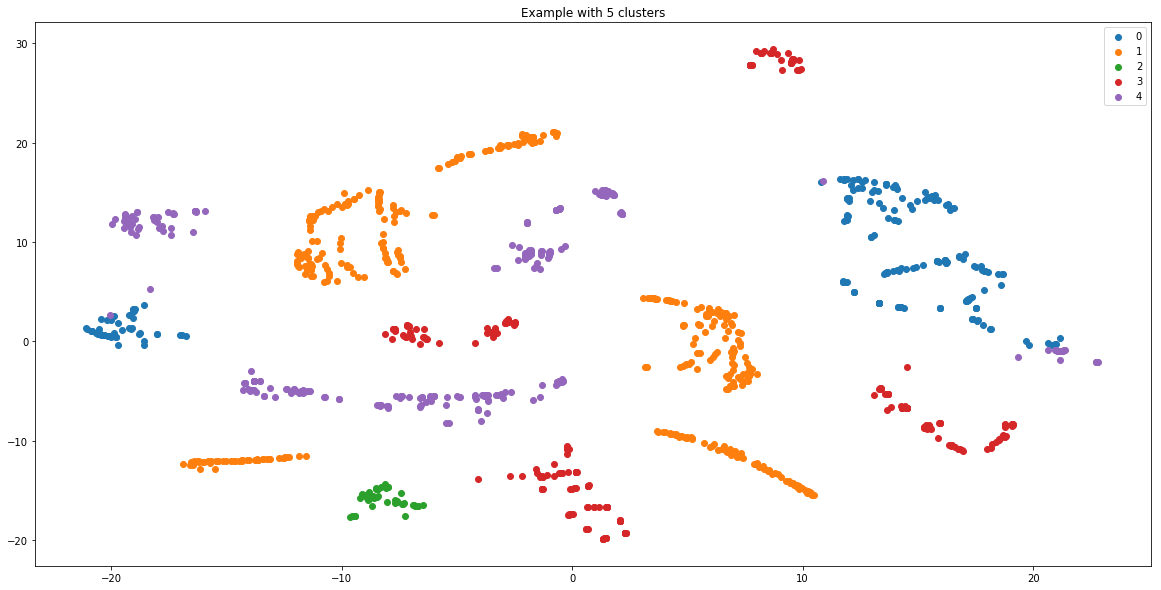

Silhouette score 0.5242951656395136
In cluster distances [0.7519810426930521, 0.8629801282407756, 0.6768651536554597, 0.8376312509019518, 0.5363572024733586, 1.991716236071462]
Between cluster distances [3.356810632143662, 3.2330903194424625, 2.6207745586877373, 3.1670317995944846, 2.829743242664701, 6.9696827185878085]
Cluster sizes [48, 270, 185, 402, 289, 46]


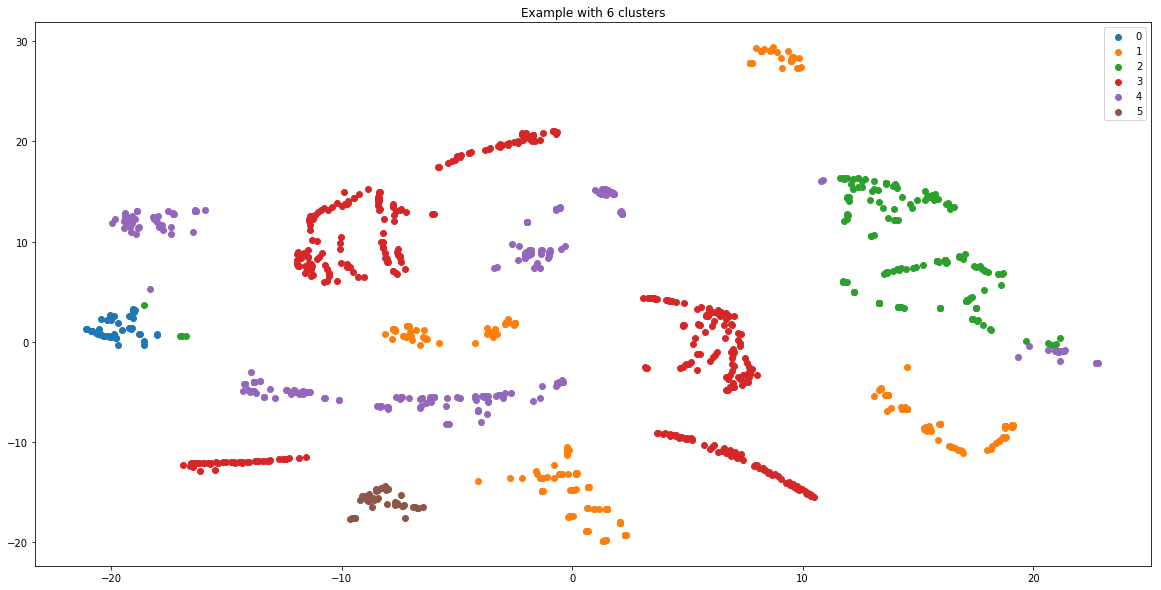

Silhouette score 0.49319719770531717
In cluster distances [0.5363572024733586, 0.6768651536554597, 0.8629801282407756, 1.991716236071462, 0.616378738917676, 0.7519810426930521, 0.6046554875341974]
Between cluster distances [2.829743242664701, 2.6207745586877373, 3.2330903194424625, 6.9696827185878085, 2.7567983810115937, 3.356810632143662, 2.9422028806783707]
Cluster sizes [289, 185, 270, 46, 177, 48, 225]


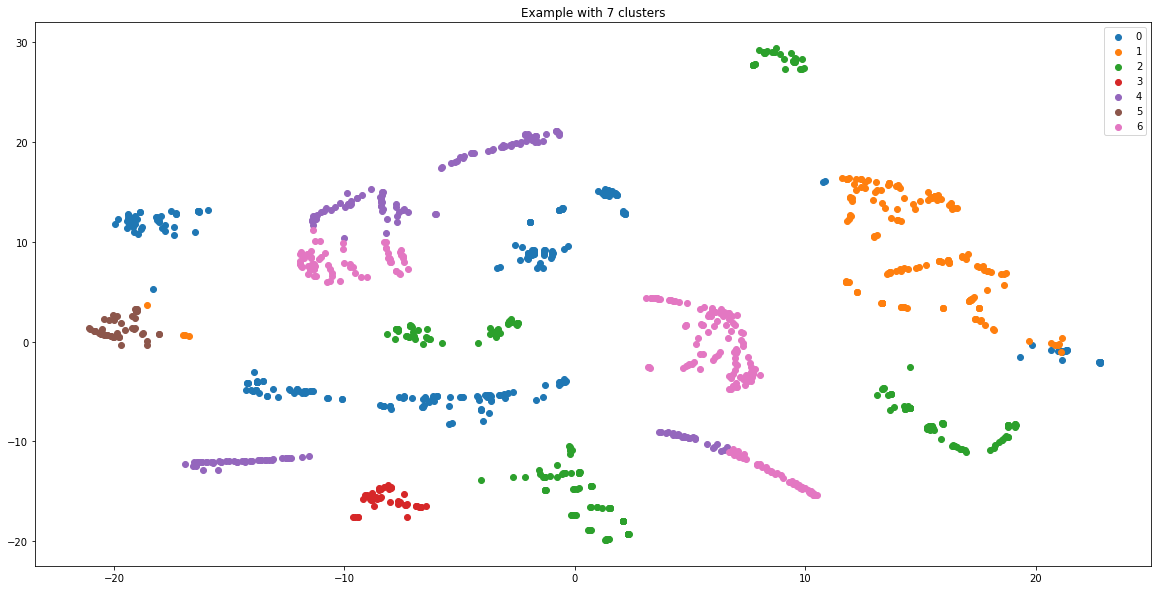

In [75]:
metrics = [silhouette_score, in_cluster_distance, between_cluster_distance, cluster_sizes]
names = ["Silhouette score", "In cluster distances", "Between cluster distances", "Cluster sizes"]
cs = []
for n_clusters in range(2, 8):
    km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10)
    clusters = km.fit_predict(X)
    cs.append(clusters)
    for name, metric in zip(names, metrics):
        print(name, metric(X, clusters))

    plt.figure(figsize=(20,10))
    for i in np.unique(clusters):
        points = X_plot[clusters == i]
        plt.scatter(points[:,0], points[:,1], label=i)
    plt.title("Example with {} clusters".format(n_clusters))
    plt.legend()
    plt.show()

In [551]:
clusters4 = cs[4 - 2]

In [552]:
str_clusters = ["c" + str(c) for c in clusters4]
cases_for_plot = cases.copy()
cases_for_plot["Clusters4"] = np.array(str_clusters)

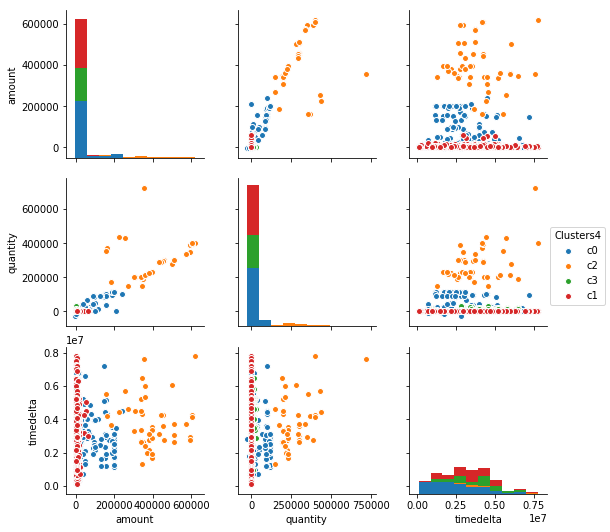

In [553]:
sns.pairplot(cases_for_plot, hue="Clusters4", vars=["amount", "quantity", "timedelta"]);

In [554]:
clusters7 = cs[7 - 2]

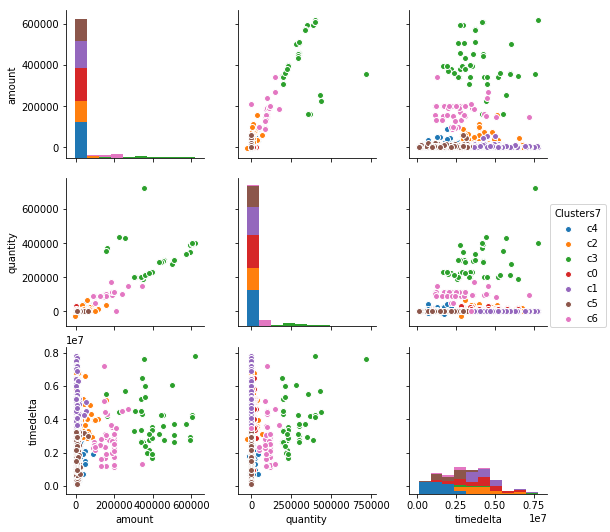

In [555]:
str_clusters = ["c" + str(c) for c in clusters7]
cases_for_plot = cases.copy()
cases_for_plot["Clusters7"] = np.array(str_clusters)
sns.pairplot(cases_for_plot, hue="Clusters7", vars=["amount", "quantity", "timedelta"]);

## Decision Tree

### 4 clusters

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [322]:
dtc = DecisionTreeClassifier()

In [332]:
dtc.fit(cases, clusters4);

In [94]:
from collections import defaultdict


def get_clusters_specs(classifier, feature_names):
    tree = classifier.tree_
    classes = classifier.classes_
    features = tree.feature
    thres = tree.threshold
    values = tree.value
    path = np.zeros(tree.node_count)
    
    def get_classes_paths(tree, node, path):
        
        r = tree.children_right[node]
        l = tree.children_left[node]
        
        result = defaultdict(list)
        reuslt_r = defaultdict(list)
        result_l = defaultdict(list)
        
        if tree.feature[node] < 0:
            path[node] = 2
            cls = classes[np.argmax(tree.value[node])]
            result[cls].append(path)
        else:
            if r > 0:
                path_r = np.copy(path)
                path_r[node] = 1
                result_r = get_classes_paths(tree, r, path_r)
            if l > 0:
                path_l = np.copy(path)
                path_l[node] = -1
                result_l = get_classes_paths(tree, l, path_l)
                
            for cls in classes:
                result[cls] = result_r[cls] + result_l[cls]
                
        return result
    
    def get_sign(x):
        if x > 0:
            return ">"
        else:
            return "<="
    
    root = 0
    classes_paths = get_classes_paths(tree, root, path)
    
    output = defaultdict(list)
    for cls in classes:
        print(cls)
        for i, path in enumerate(classes_paths[cls]):
            cls_path = []
            print("object of type" + str(i))
            for j, node in enumerate(path):
                sign = ">"
                sign = get_sign(node)
                if abs(node) == 1 :
                    feature = feature_names[tree.feature[j]]
                    thres = tree.threshold[j]
                    print("{0} {1} {2}".format(feature, sign, thres))
                if node == 2:
                    print(tree.n_node_samples[j], "objects")
                
        print()
                
                    

In [420]:
get_clusters_specs(dtc, list(cases.columns))
print(list(zip(list(cases.columns), dtc.feature_importances_)))

class1
object of type0
material > 0.20975862443447113
402 objects

class2
object of type0
material <= 0.20975862443447113
vendor <= 0.0740041434764862
quantity <= 131714.0
521 objects

class3
object of type0
material <= 0.20975862443447113
vendor > 0.0740041434764862
270 objects

class4
object of type0
material <= 0.20975862443447113
vendor <= 0.0740041434764862
quantity > 131714.0
47 objects

[('amount', 0.0), ('quantity', 0.1038569001409838), ('timedelta', 0.0), ('vendor', 0.4074134827607504), ('material', 0.48872961709826573)]


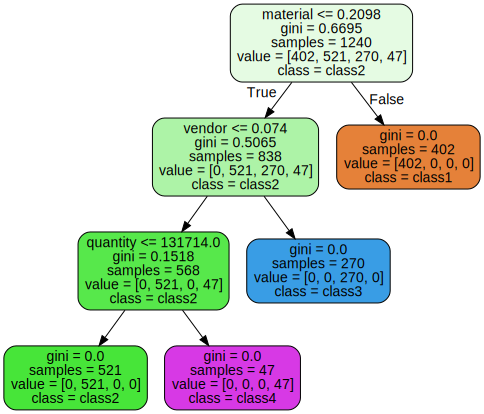

In [367]:
dot_data = export_graphviz(dtc, out_file=None, 
                         feature_names=cases.columns,  
                         class_names=["class" + str(c) for c in range(1, 5)],  
                         filled=True, rounded=True,  
                         special_characters=False)  
graph = graphviz.Source(dot_data)  
graph 

### 7 clusters

In [426]:
dtc.fit(cases, ["class" + str(c) for c in clusters7]);

In [427]:
get_clusters_specs(dtc, list(cases.columns))
print(list(zip(list(cases.columns), dtc.feature_importances_)))

class0
object of type0
vendor <= 0.07803938537836075
material > 0.18502886593341827
timedelta > 3265481.0
timedelta > 3350568.0
219 objects
object of type1
vendor <= 0.07803938537836075
material > 0.18502886593341827
timedelta > 3265481.0
timedelta <= 3350568.0
vendor <= 0.02743225172162056
5 objects
object of type2
vendor <= 0.07803938537836075
material > 0.18502886593341827
timedelta <= 3265481.0
timedelta > 3231203.0
quantity <= 22.0
1 objects

class1
object of type0
vendor <= 0.07803938537836075
material <= 0.18502886593341827
timedelta <= 2661475.0
quantity <= 46556.3125
290 objects

class2
object of type0
vendor <= 0.07803938537836075
material <= 0.18502886593341827
timedelta > 2661475.0
quantity > 74401.0
quantity <= 183460.0
21 objects
object of type1
vendor <= 0.07803938537836075
material <= 0.18502886593341827
timedelta > 2661475.0
quantity <= 74401.0
amount > 183245.0
1 objects
object of type2
vendor <= 0.07803938537836075
material <= 0.18502886593341827
timedelta <= 2661475

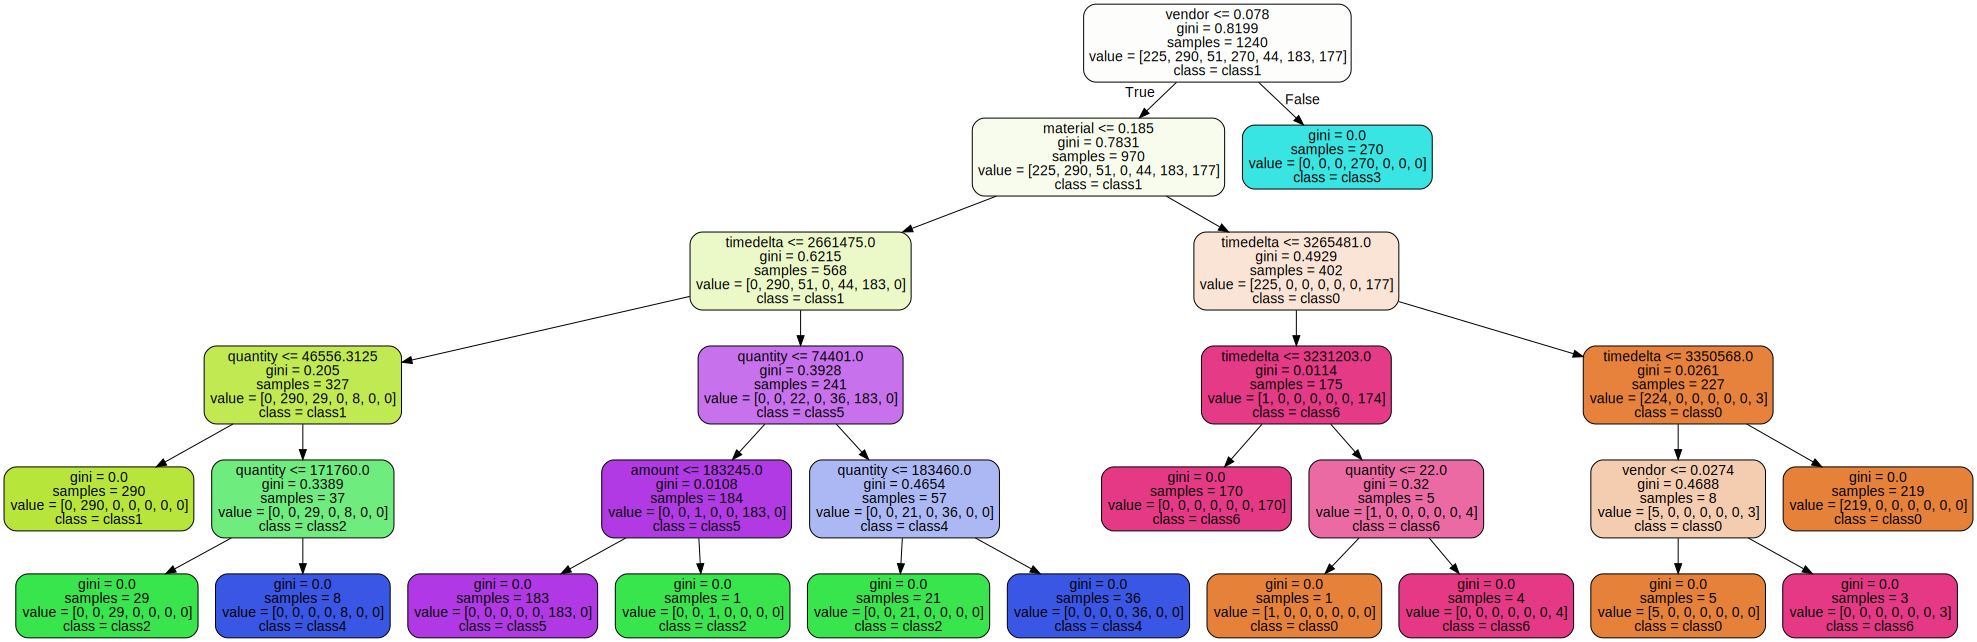

In [430]:
dot_data = export_graphviz(dtc, out_file=None, 
                         feature_names=cases.columns,  
                         class_names=["class" + str(c) for c in range(7)],  
                         filled=True, rounded=True,  
                         special_characters=False)  
graph = graphviz.Source(dot_data)  
graph 

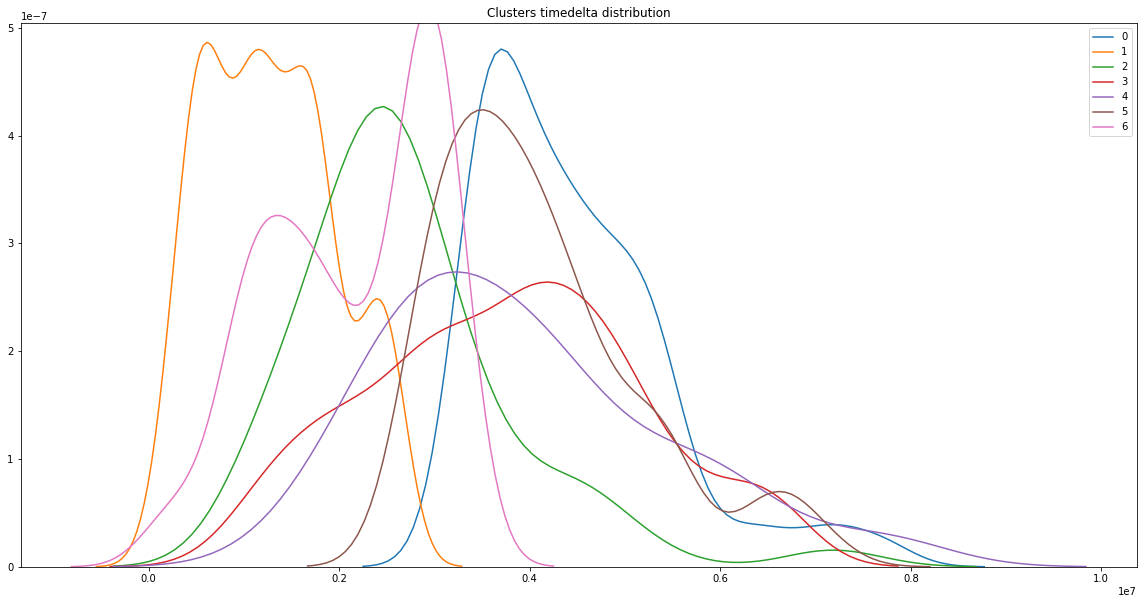

In [449]:
plt.figure(figsize=(20,10))
for cluster in np.unique(clusters7):
    timedelta = list(cases[clusters7 == cluster]["timedelta"])
    sns.distplot(timedelta, label=str(cluster), hist=False)
plt.legend()
plt.title("Clusters timedelta distribution");

# ToDo
* Векторизация все вещественные признаки + последовательность событий закодированная бинарным вектором
* Более сложные методы кластеризации (Mean Shift, Spectral Clustering, DBSCAN, XMeans (optional)) для вещественных признаков

# New features

Adding nubmers of events in cases, and number of users

In [105]:
cases_length = []
users_number = []
credit_notes = []
for case_id in case_ids:
    case = data[data["CASE"] == case_id]
    cases_length.append(case.shape[0])
    users_number.append(np.unique(case["User ID"]).size)
    credit_notes.append(case[case["SIMPLIFIED EVENT"] == "Credit Note"].shape[0])

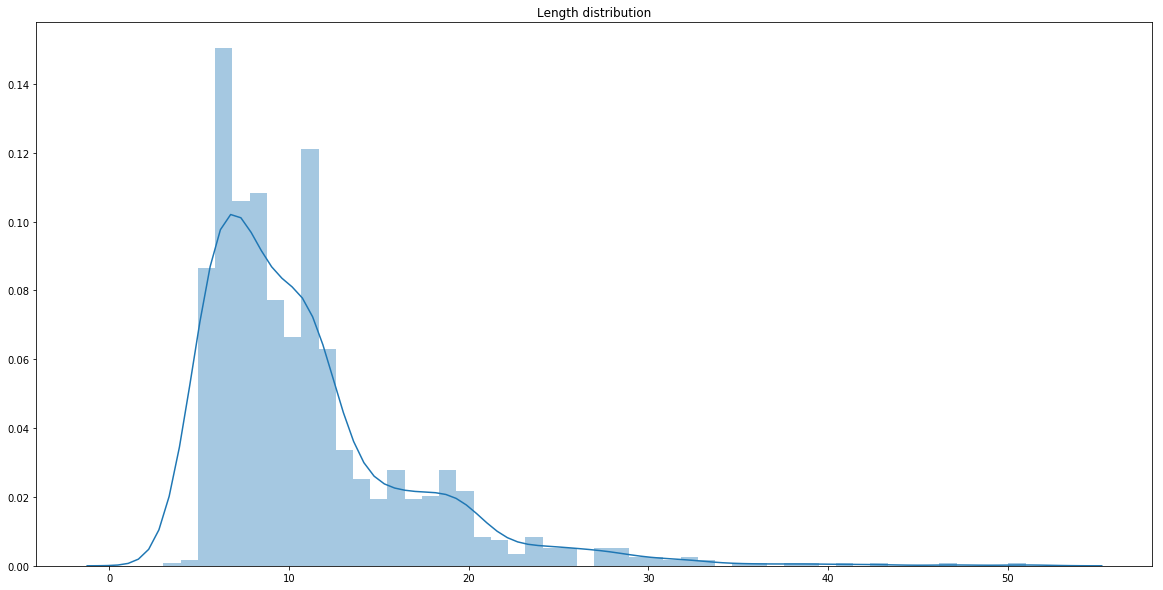

In [106]:
plt.figure(figsize=(20,10))
sns.distplot(cases_length)
plt.title("Length distribution");

In [112]:
cases["length"] = cases_length
cases["creaditnote"] = credit_notes
# cases["usersnum"] = users_number

In [113]:
cases.head()

,amount,quantity,timedelta,vendor,material,length,creaditnote
2000475085-10,0.00,0.0,784667,0.003628,0.001333,5,0
2000475591-10,3536.45,1008.0,6736564,0.006590,0.001407,6,0
2000475831-10,156000.00,100000.0,7772220,0.001481,0.002073,20,0
2000475925-10,293.13,4560.0,4826788,0.107656,0.046868,12,0
2000475925-30,358.18,5920.0,4826788,0.107656,0.046868,12,0


In [114]:
from sklearn.manifold import TSNE
X = ss.fit_transform(cases)
X_plot = TSNE(n_components=2).fit_transform(X)

Silhouette score 0.6304384277729448
In cluster distances [2.0081347233295457, 3.490965886042805]
Between cluster distances [7.761324001349057, 7.761324001349057]
Cluster sizes [1191, 49]


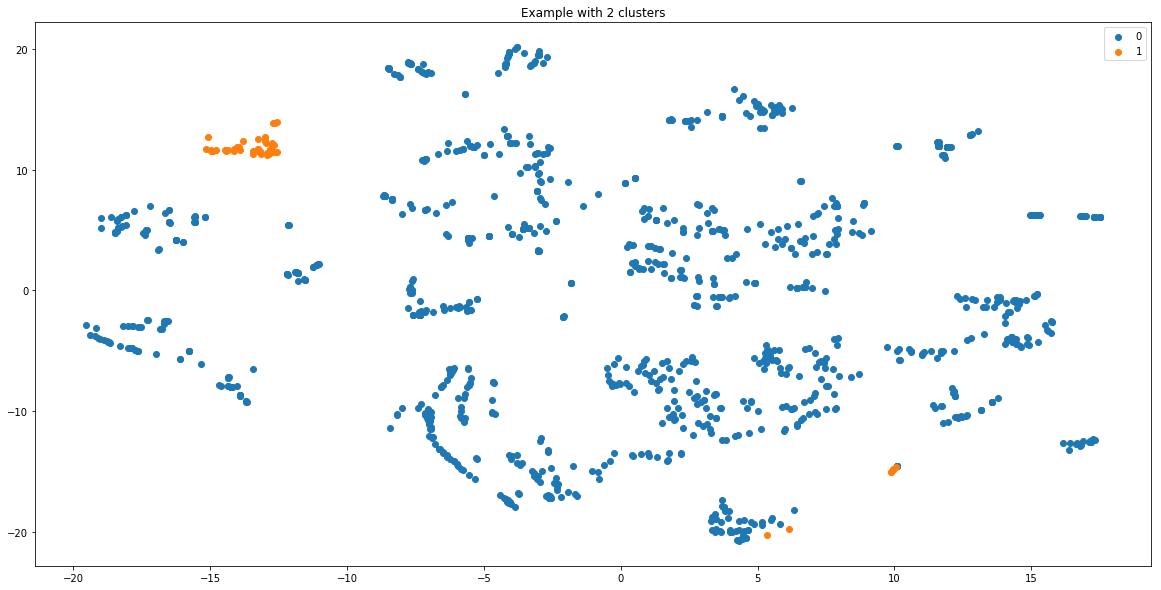

Silhouette score 0.3193063738856453
In cluster distances [1.7733921535371027, 1.427701859005739, 3.490965886042805]
Between cluster distances [3.772170212595312, 3.5762476036511583, 7.761324001349057]
Cluster sizes [789, 402, 49]


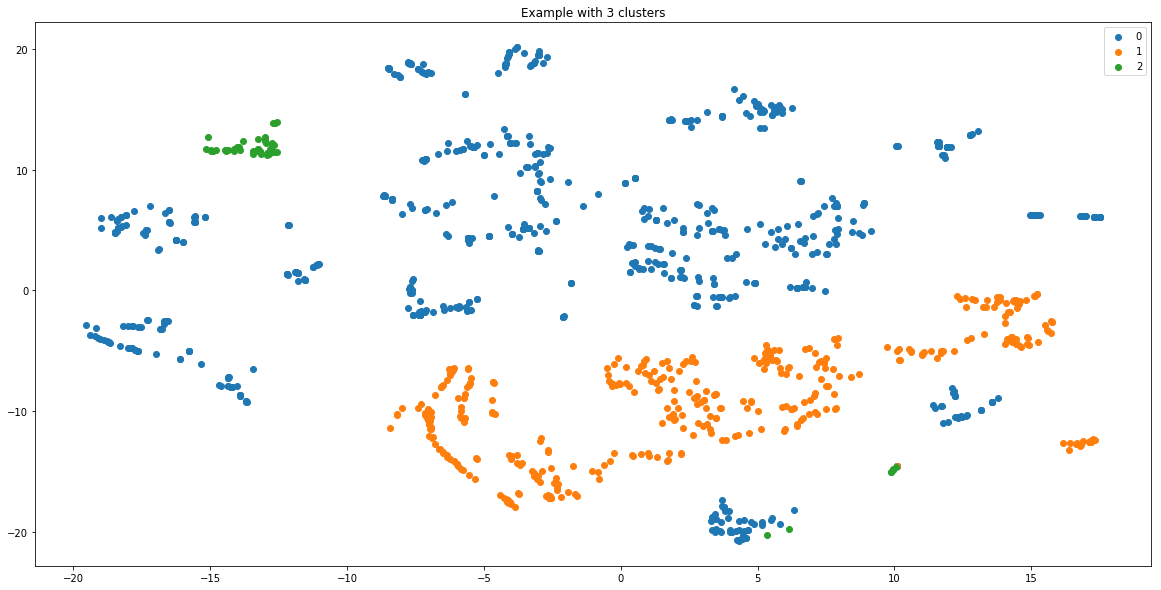

Silhouette score 0.4080808026181699
In cluster distances [1.3070842181350275, 3.506527064399878, 1.173761835802396, 1.427701859005739]
Between cluster distances [3.456869467019313, 7.835097237989007, 3.5787122836150993, 3.5762476036511583]
Cluster sizes [512, 48, 278, 402]


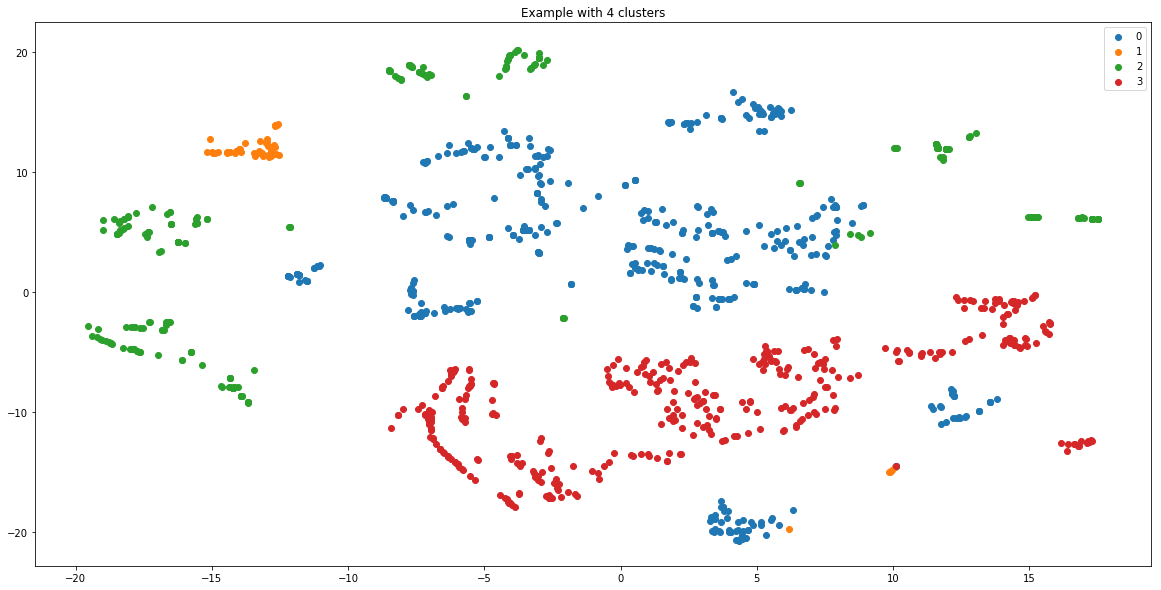

Silhouette score 0.41946882483970066
In cluster distances [1.173761835802396, 1.1593064486793354, 2.4005077017307808, 1.4058709002998986, 4.397595169110311]
Between cluster distances [3.5787122836150993, 3.398012417162518, 5.94976009331597, 3.5665564647361183, 12.534663005479906]
Cluster sizes [278, 485, 67, 401, 9]


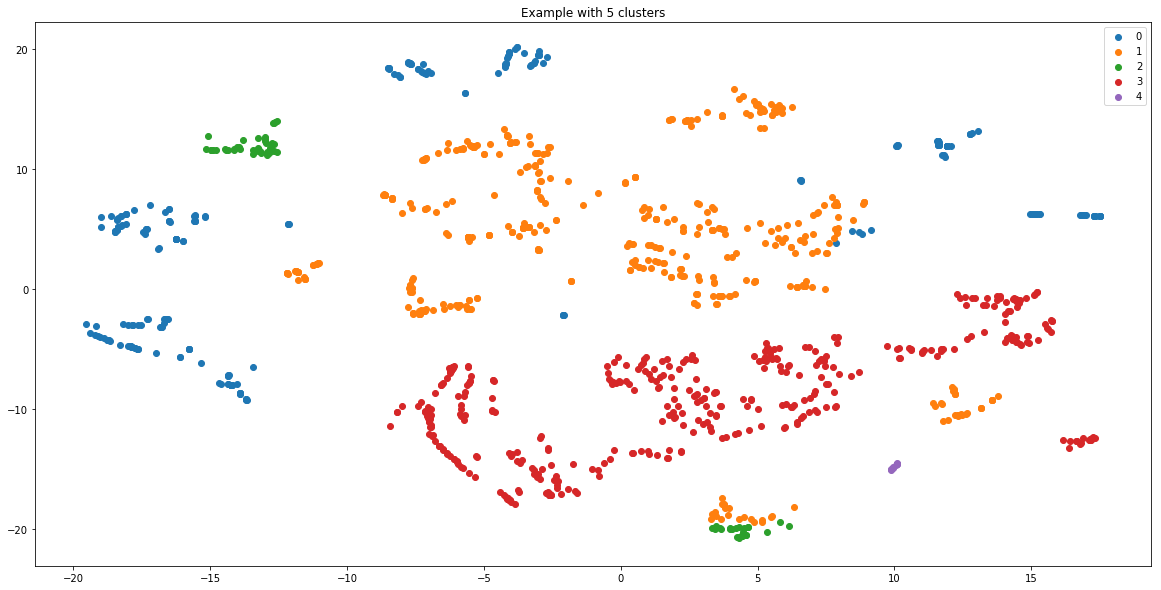

Silhouette score 0.44768774012812096
In cluster distances [1.2272808067838108, 2.1771541841628217, 0.9555881841747397, 1.4499358745521296, 4.397595169110311, 1.0478750841646516]
Between cluster distances [3.434061589332378, 7.067454171092869, 3.387591093055591, 3.8579696570012407, 12.534663005479906, 3.5266162024040923]
Cluster sizes [503, 44, 307, 109, 9, 268]


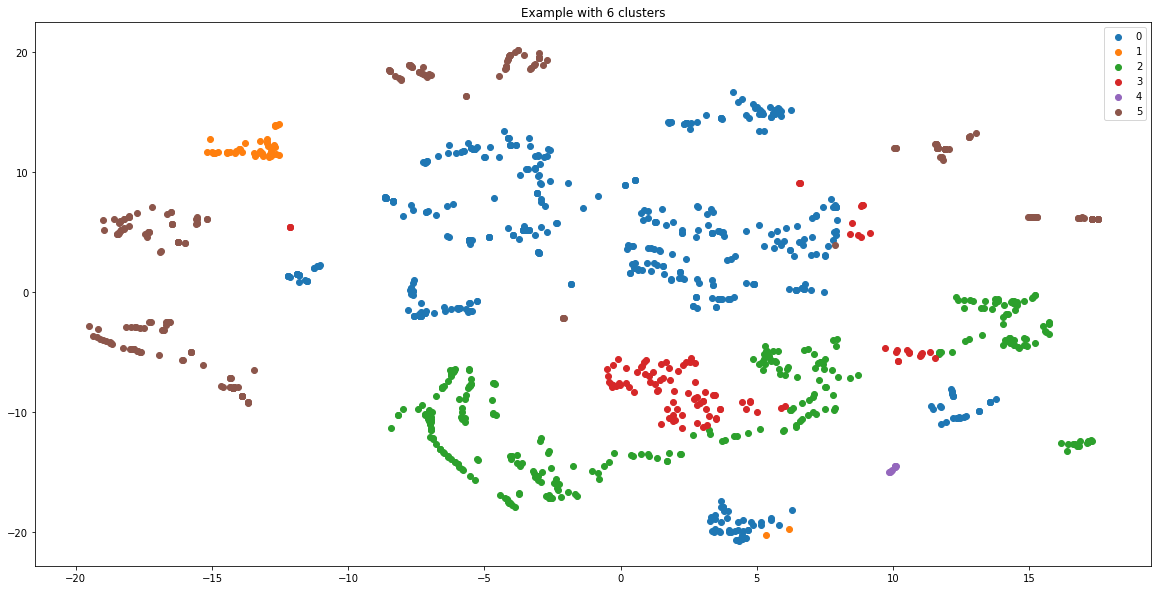

Silhouette score 0.4277278520006253
In cluster distances [0.6782106707306693, 1.2901021891215534, 2.12155045947412, 1.4815220952261363, 0.9555881841747397, 1.0438446801045933, 4.397595169110311]
Between cluster distances [3.1530124341975947, 3.092902937035449, 7.17177642874127, 3.830385598936034, 3.387591093055591, 3.527121693428617, 12.534663005479906]
Cluster sizes [281, 221, 42, 113, 307, 267, 9]


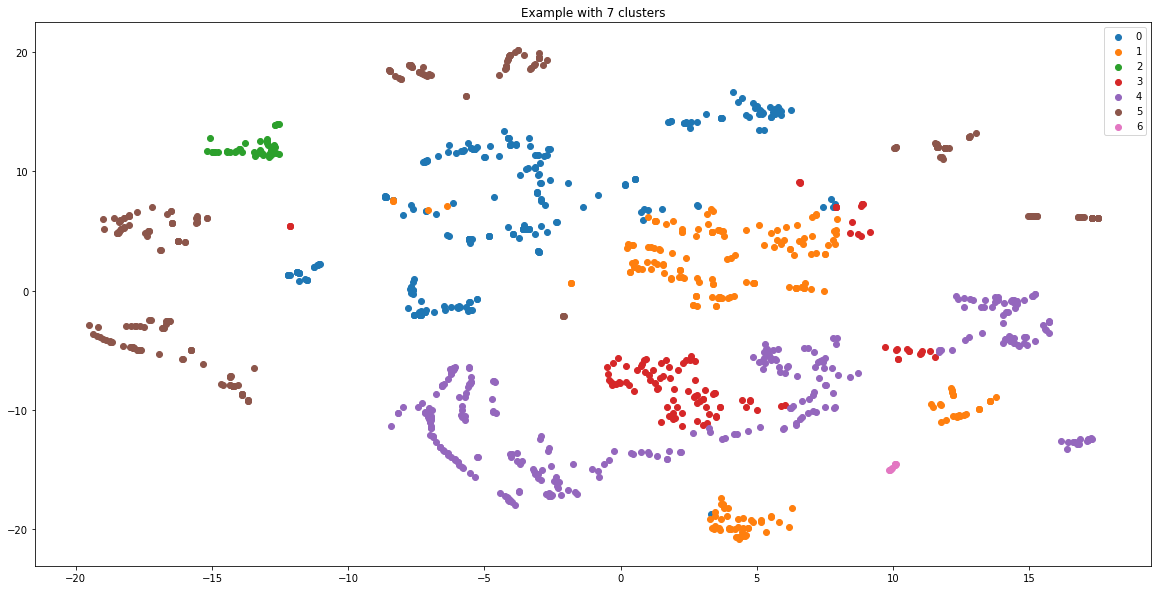

In [115]:
metrics = [silhouette_score, in_cluster_distance, between_cluster_distance, cluster_sizes]
names = ["Silhouette score", "In cluster distances", "Between cluster distances", "Cluster sizes"]
cs = []
for n_clusters in range(2, 8):
    km = KMeans(n_clusters=n_clusters, max_iter=100000, n_init=10)
    clusters = km.fit_predict(X)
    cs.append(clusters)
    for name, metric in zip(names, metrics):
        print(name, metric(X, clusters))

    plt.figure(figsize=(20,10))
    for i in np.unique(clusters):
        points = X_plot[clusters == i]
        plt.scatter(points[:,0], points[:,1], label=i)
    plt.title("Example with {} clusters".format(n_clusters))
    plt.legend()
    plt.show()

In [116]:
clusters2 = cs[2 - 2]

In [117]:
str_clusters = ["c" + str(c) for c in clusters2]
cases_for_plot = cases.copy()
cases_for_plot["Clusters2"] = np.array(str_clusters)

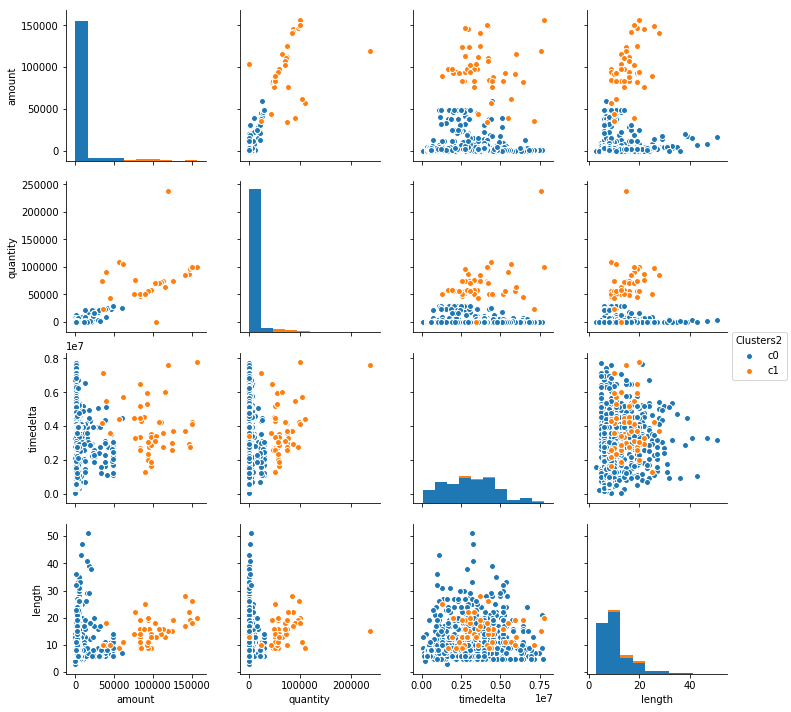

In [118]:
sns.pairplot(cases_for_plot, hue="Clusters2", vars=["amount", "quantity", "timedelta", "length"]);

In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(cases, clusters2);

In [120]:
get_clusters_specs(dtc, list(cases.columns))
print(list(zip(list(cases.columns), dtc.feature_importances_)))

0
object of type0
quantity <= 36317.0
amount <= 81724.0
creaditnote > 0.5
timedelta <= 5380700.5
4 objects
object of type1
quantity <= 36317.0
amount <= 81724.0
creaditnote <= 0.5
1187 objects

1
object of type0
quantity > 36317.0
47 objects
object of type1
quantity <= 36317.0
amount > 81724.0
1 objects
object of type2
quantity <= 36317.0
amount <= 81724.0
creaditnote > 0.5
timedelta > 5380700.5
1 objects

[('amount', 0.02119437760308575), ('quantity', 0.9575756538994474), ('timedelta', 0.01699823506228688), ('vendor', 0.0), ('material', 0.0), ('length', 0.0), ('creaditnote', 0.004231733435179822)]


In [121]:
from sklearn.cluster import DBSCAN

In [138]:
scores = np.zeros((len(np.arange(0.1, 2, 0.2)), len(np.arange(1, 20)) ))
for i, eps in tqdm_notebook(enumerate(np.arange(0.1, 2, 0.2))):
    for j, min_samples in enumerate(np.arange(1, 20)): 
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X);
        for name, metric in zip(names[:1], metrics[:1]):
                scores[i][j] = metric(X, clusters)
                print(name, metric(X, clusters))
        print("eps={} min_samples={}".format(eps, min_samples))

#         plt.figure(figsize=(20,10))
#         for i in np.unique(clusters):
#                 points = X_plot[clusters == i]
#                 plt.scatter(points[:,0], points[:,1], label=i)
#         plt.title("DBSCAN eps={} min_samples={}".format(eps, min_samples))
#         plt.legend()
#         plt.show()

Silhouette score 0.34879274933795656
eps=0.1 min_samples=1
Silhouette score 0.04446860045724313
eps=0.1 min_samples=2
Silhouette score -0.158133744134937
eps=0.1 min_samples=3
Silhouette score -0.21946478729290392
eps=0.1 min_samples=4
Silhouette score -0.2762065306595074
eps=0.1 min_samples=5
Silhouette score -0.3448317209756542
eps=0.1 min_samples=6
Silhouette score -0.39170738517408826
eps=0.1 min_samples=7
Silhouette score -0.39741555846791254
eps=0.1 min_samples=8
Silhouette score -0.4200055752177746
eps=0.1 min_samples=9
Silhouette score -0.37020318350628967
eps=0.1 min_samples=10
Silhouette score -0.37020318350628967
eps=0.1 min_samples=11
Silhouette score -0.3152229638206525
eps=0.1 min_samples=12
Silhouette score -0.28940599027842656
eps=0.1 min_samples=13
Silhouette score -0.12431566585677137
eps=0.1 min_samples=14
Silhouette score -0.12431566585677137
eps=0.1 min_samples=15
Silhouette score -0.12431566585677137
eps=0.1 min_samples=16
Silhouette score -0.12431566585677137
eps

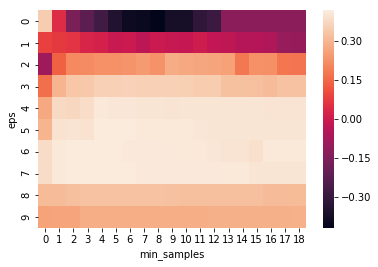

In [141]:
sns.heatmap(scores)
plt.xlabel("min_samples")
plt.ylabel("eps")

In [149]:
a = np.argmax(scores.tolist())

In [152]:
i = a // len(np.arange(1, 20))

In [151]:
j = a % len(np.arange(1, 20))

In [154]:
scores[i][j]

0.4167176043096579

In [156]:
eps = (np.arange(0.1, 2, 0.2))[i]
min_samples = (np.arange(1, 20))[j]
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X);
for name, metric in zip(names[:1], metrics[:1]):
        scores[i][j] = metric(X, clusters)
        print(name, metric(X, clusters))
print("eps={} min_samples={}".format(eps, min_samples))

Silhouette score 0.4167176043096579
eps=1.1000000000000003 min_samples=5


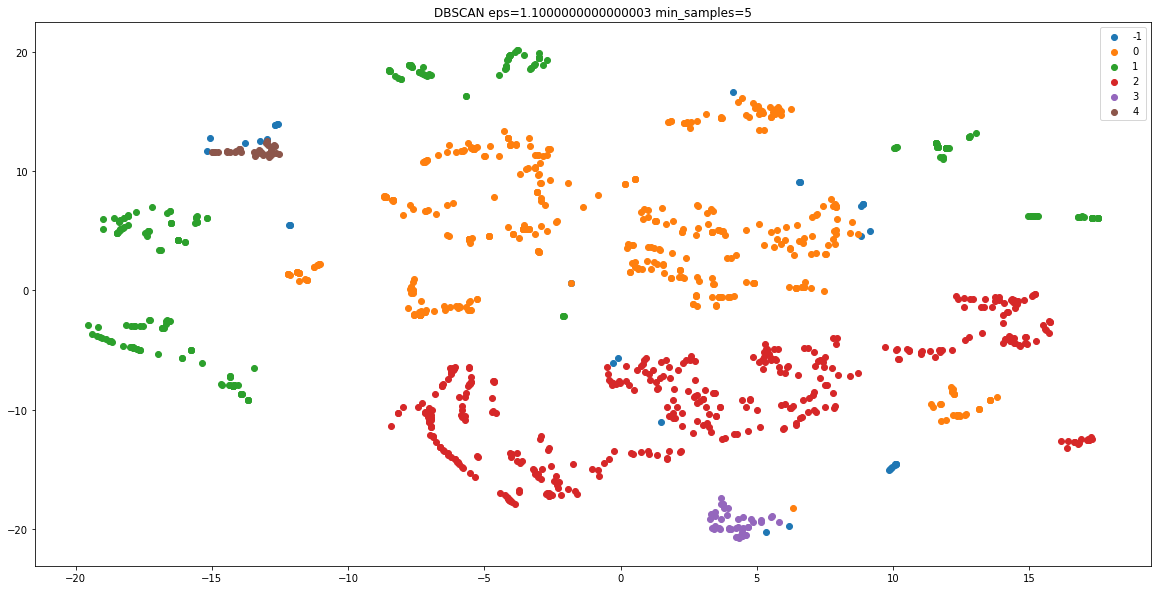

In [157]:
plt.figure(figsize=(20,10))
for i in np.unique(clusters):
        points = X_plot[clusters == i]
        plt.scatter(points[:,0], points[:,1], label=i)
plt.title("DBSCAN eps={} min_samples={}".format(eps, min_samples))
plt.legend()
plt.show()

In [159]:
for name, metric in zip(names, metrics):
#         scores[i][j] = metric(X, clusters)
        print(name, metric(X, clusters))

Silhouette score 0.4167176043096579
In cluster distances [6.204120412941566, 1.0955953692486293, 1.0438446801045933, 1.3772444463222169, 0.7873236509723199, 1.4528999595546033]
Between cluster distances [7.396123018755075, 3.3493366156625783, 3.527121693428617, 3.5547232774971476, 3.5495620458663004, 6.7520897301622425]
Cluster sizes [39, 460, 267, 398, 44, 32]


In [160]:
dtc = DecisionTreeClassifier()
dtc.fit(cases, clusters);

In [161]:
get_clusters_specs(dtc, list(cases.columns))
print(list(zip(list(cases.columns), dtc.feature_importances_)))

-1
object of type0
material > 0.20975862443447113
quantity > 27.5
amount > 6259.4599609375
2 objects
object of type1
material > 0.20975862443447113
quantity <= 27.5
creaditnote > 0.5
1 objects
object of type2
material > 0.20975862443447113
quantity <= 27.5
creaditnote <= 0.5
timedelta > 7648887.0
amount > 1189.5999755859375
1 objects
object of type3
material <= 0.20975862443447113
vendor > 0.0740041434764862
timedelta <= 1134006.5
3 objects
object of type4
material <= 0.20975862443447113
vendor <= 0.0740041434764862
quantity > 17513.5
quantity > 36317.0
material > 0.004442470148205757
creaditnote > 0.5
4 objects
object of type5
material <= 0.20975862443447113
vendor <= 0.0740041434764862
quantity > 17513.5
quantity > 36317.0
material > 0.004442470148205757
creaditnote <= 0.5
length > 25.0
1 objects
object of type6
material <= 0.20975862443447113
vendor <= 0.0740041434764862
quantity > 17513.5
quantity > 36317.0
material > 0.004442470148205757
creaditnote <= 0.5
length <= 25.0
timedelta

In [162]:
str_clusters = ["c" + str(c) for c in clusters]
cases_for_plot = cases.copy()
cases_for_plot["Clusters"] = np.array(str_clusters)